# Demo: Decision Trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the Iris dataset
iris = load_iris()

# We're going to consider two of the four feature names, petal length
# and petal width, and we'll ignore sepal length and width.
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2).fit(X, y)

In [4]:
# Let's take a look at the decision tree...
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="iris_tree.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

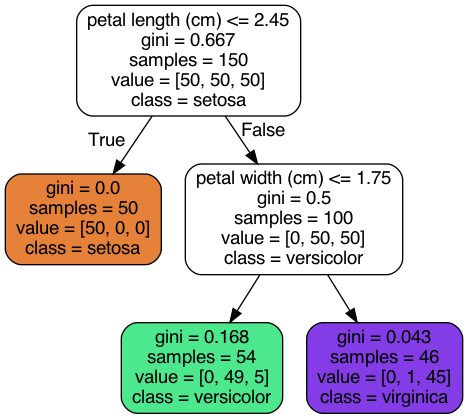

In [5]:
# dot will convert the tree from a .dot file to a .png
# In case you don't have dot installed, the png is already
# in your zip file
!dot -Tpng iris_tree.dot -o iris_tree.png
from IPython.display import Image
Image('iris_tree.png')

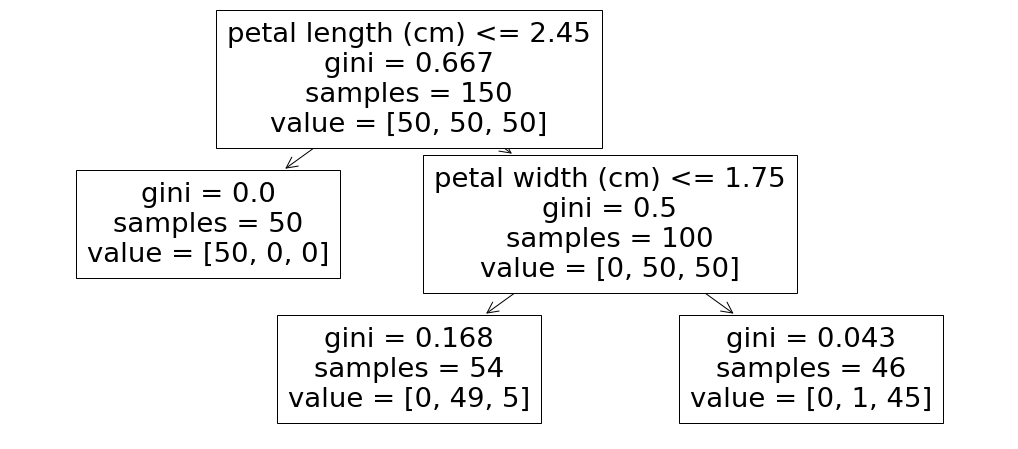

In [6]:
# We can also have scikit-learn plot the tree...
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 8))
plot_tree(tree_clf, feature_names=iris.feature_names[2:]);

## Let's see how we did...

In [7]:
tree_clf.score(X, y)

0.96

In [8]:
tree_clf.feature_importances_

array([0.56199095, 0.43800905])

## Feature Importances
* Because of the way the model works, we can determine which features were important by computing the total amount of information gained from splitting on a per-feature basis
* The "most important feature" is the one whose splits most increased homogeniety during training

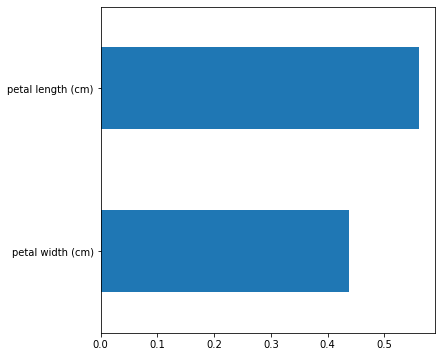

In [9]:
import pandas as pd
feat_importances = pd.Series(tree_clf.feature_importances_, index=iris.feature_names[2:])
feat_importances.sort_values().plot(kind='barh', figsize=(6, 6));

## Suppose we encountered a new iris in the wild...
* we mesure the petal length at 5.0 cm and petal width 1.5 cm
* ...what are the probabilities we would classify it as each of the different species of iris?

In [10]:
tree_clf.predict_proba([[5.0, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

In [12]:
iris.target_names[1]

'versicolor'

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])